In [1]:
import pandas as pd
import os
import tarfile
import gzip


In [2]:
PATH_BA = '../Data/BeerAdvocate_CSV.tar.gz'
PATH_RB = '../Data/RateBeer_CSV.tar.gz'
folder_BA = tarfile.open(PATH_BA)
folder_RB = tarfile.open(PATH_RB)

For RateBeer and BeerAdvocate, we extracted each review and transformed it in a dataframe with all the reviews.

In [3]:
# Extracting the files for BeerAdvocate
df_beers_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/beers.csv')))
df_users_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/users.csv')))
df_reviews_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/reviews.csv')))
df_breweries_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/breweries.csv')))

# Extracting the files for RateBeer
df_beers_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/beers.csv')))
df_users_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/users.csv')))
df_reviews_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/reviews.csv')))
df_breweries_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/breweries.csv')))

In [4]:
#For RateBeer review, we added 2 columns in the dataframe with the nationality of the user and the location of the brewery. 
user_nat_RB=pd.DataFrame()
user_nat_RB['user_name']=df_users_RB['user_name']
user_nat_RB['location_user']=df_users_RB['location']
new_reviews_RB=pd.merge(df_reviews_RB, user_nat_RB,  how='inner', on='user_name')

beers_nat_RB=pd.DataFrame()
beers_nat_RB['beer_id']=df_breweries_RB['id']
beers_nat_RB['beers_location']=df_breweries_RB['location']
new_reviews_RB['beer_id']=new_reviews_RB['beer_id'].apply(lambda x: int(x))
df_RB= pd.merge(new_reviews_RB, beers_nat_RB, how='inner', on='beer_id')
#df_RB=df_RB.dropna(subset=['appearance', 'aroma','palate', 'taste', 'overall', 'rating', 'location_user', 'beers_location'])

In [5]:
#For  BeerAdvocate review, we added 2 columns in the dataframe with the nationality of the user and the location of the brewery. 
user_nat_BA=pd.DataFrame()
user_nat_BA['user_name']=df_users_BA['user_name']
user_nat_BA['location_user']=df_users_BA['location']
new_reviews_BA=pd.merge(df_reviews_BA, user_nat_BA,  how='inner', on='user_name')

beers_nat_BA=pd.DataFrame()
beers_nat_BA['beer_id']=df_breweries_BA['id']
beers_nat_BA['beers_location']=df_breweries_BA['location']
new_reviews_BA['beer_id']=new_reviews_BA['beer_id'].apply(lambda x: int(x))
df_BA = pd.merge(new_reviews_BA, beers_nat_BA, how='inner', on='beer_id')
#df_BA=df_BA.dropna(subset=['appearance', 'aroma','palate', 'taste', 'overall', 'rating', 'location_user', 'beers_location'])

In [6]:
#Here we extracted from wikipedia a tab the list Us states abreviations.
US_states = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')[0] 
US_states['Subdivision name (en)'] = US_states['Subdivision name (en)'].apply(lambda x: 'United States, ' + x) 
US_states['Code'] = US_states['Code'].apply(lambda x: x[3:]) 
US_states.drop(columns=['Subdivision category'], inplace=True) 
 
#For BA and RB we added 2 columns with the state of the user and the state of the brewery if they are from the US.
US_states_user=US_states.rename(columns={'Subdivision name (en)':'location_user', 'Code':'US_Code_User'}) 
US_states_beer=US_states.rename(columns={'Subdivision name (en)':'beers_location', 'Code':'US_Code_Beer'}) 
US_states_beer 
df_BA=pd.merge(US_states_beer, df_BA, how='outer', on='beers_location') 
df_BA=pd.merge(US_states_user, df_BA, how='outer', on='location_user') 

df_RB=pd.merge(US_states_beer, df_RB, how='outer', on='beers_location')
df_RB=pd.merge(US_states_user, df_RB, how='outer', on='location_user')
 
def keep_United_States_if_in_the_string(x): 
    if 'United States' in x: 
        return 'United States' 
    else: 
        return x 
 
# for the location and nationalities we kept only 'United States' and removed the State name after the comma for ploting.

df_BA['beers_location']=df_BA['beers_location'].apply(lambda x: str(x)) 
df_BA['beers_location']=df_BA['beers_location'].apply(lambda x: keep_United_States_if_in_the_string(x)) 
df_BA['location_user']=df_BA['location_user'].apply(lambda x: str(x)) 
df_BA['location_user']=df_BA['location_user'].apply(lambda x: keep_United_States_if_in_the_string(x)) 

df_RB['beers_location']=df_RB['beers_location'].apply(lambda x: str(x))
df_RB['beers_location']=df_RB['beers_location'].apply(lambda x: keep_United_States_if_in_the_string(x))
df_RB['location_user']=df_RB['location_user'].apply(lambda x: str(x))
df_RB['location_user']=df_RB['location_user'].apply(lambda x: keep_United_States_if_in_the_string(x))

df_RB

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.085652e+09,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.216030e+09,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.211623e+09,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.175594e+09,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.160042e+09,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661198,NaN,Nicaragua,NaN,Switzerland,Cerveza Premium (Nicaragua),26300.0,Compañía Cevercera de Nicaragua,3912.0,Pale Lager,4.0,1.218103e+09,Zavalas1,79805.0,5.0,10.0,5.0,10.0,20.0,5.0,"I have Tried beers from all over the world, an..."
1661199,NaN,Sint Maarten,NaN,France,Belzebuth 13°,4489.0,Grain dOrge (Brasseurs De Gayant),759.0,Belgian Strong Ale,13.0,1.427195e+09,JBaggett2013,362979.0,5.0,6.0,5.0,7.0,20.0,4.3,"caramel, roasty, resin, leather, alcohol, wood..."
1661200,NaN,Haiti,NaN,Japan,Oakham Helter Skelter,6309.0,Oakham,1100.0,Premium Bitter/ESB,5.0,1.252231e+09,skipoffwork,95191.0,5.0,10.0,5.0,10.0,20.0,5.0,This is the best beer Iâve tasted in a long ...
1661201,NaN,Tibet,NaN,Lithuania,Westvleteren 12 (XII),4934.0,Westvleteren Abdij St. Sixtus,623.0,Abt/Quadrupel,10.2,1.359889e+09,oooriii,228391.0,5.0,10.0,5.0,10.0,20.0,5.0,"Perfect, complete and complex. Grape, fig and ..."


Describing data Rendu 3

In [7]:
df_RB.describe()

,beer_id,brewery_id,abv,date,user_id,appearance,aroma,palate,taste,overall,rating
count,1.661189e+06,1.661189e+06,1.629168e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06
mean,8.914907e+03,1.352321e+03,6.108667e+00,1.246093e+09,7.751208e+04,3.381471e+00,6.071589e+00,3.185382e+00,6.225879e+00,1.266904e+01,3.153338e+00
std,8.907137e+03,2.899499e+03,1.925222e+00,1.285409e+08,9.533349e+04,8.610607e-01,1.766814e+00,8.736617e-01,1.742097e+00,3.623481e+00,7.978916e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,9.555336e+08,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.325000e+03,1.430000e+02,4.900000e+00,1.142852e+09,1.018500e+04,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01,2.700000e+00
50%,5.719000e+03,5.350000e+02,5.500000e+00,1.235473e+09,3.905700e+04,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.300000e+01,3.300000e+00
75%,1.383800e+04,1.390000e+03,7.000000e+00,1.354014e+09,1.010440e+05,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,3.224600e+04,3.187200e+04,2.900000e+01,1.501495e+09,4.899080e+05,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


In [8]:
#count the nan value in the dataframe
#finalement ya pas tant que ca je pense c'est exploitable on peu faire la prediction
df_RB.isna().sum()

US_Code_User       791225
location_user           0
US_Code_Beer      1176349
beers_location          0
beer_name              14
beer_id                14
brewery_name           14
brewery_id             14
style                  14
abv                 32035
date                   14
user_name              14
user_id                14
appearance             14
aroma                  14
palate                 14
taste                  14
overall                14
rating                 14
text                  217
dtype: int64

In [9]:
#count the Us code users/ en gros le nombre de reviews par etat sur la nationalite de la personne qui a écrit la review
df_RB['US_Code_User'].value_counts()

#certains état ya trop peu de valeur pour être représentatif
#find rows with less than 1000 reviews¨
df_RB['US_Code_User'].value_counts()[df_RB['US_Code_User'].value_counts()<1000]

#je pense qu'on pourra enlever ces states car c'est des iles mais faudrait faire un comparatif par rapport à la population


HI    831
SD    787
WY    736
DC      1
AS      1
GU      1
MP      1
PR      1
UM      1
VI      1
Name: US_Code_User, dtype: int64

In [10]:
#count the Us code beer/ en gros le nombre de reviews par etat sur la nationalite de la biere

df_RB['US_Code_Beer'].value_counts()

#find rows with less than 1000 reviews¨
df_RB['US_Code_Beer'].value_counts()[df_RB['US_Code_Beer'].value_counts()<1000]


SD    899
WV    878
ND    459
RI    337
DC      1
AS      1
GU      1
MP      1
PR      1
UM      1
VI      1
Name: US_Code_Beer, dtype: int64

In [11]:
#nombre de biere par state
df_RB
#Nombre de biere differentes produites par chauques etats
df_RB_beer_per_state=df_RB.drop_duplicates(subset=['beer_id'])
df_RB_beer_per_state.value_counts('US_Code_Beer')

US_Code_Beer
CA    685
CO    306
WA    306
NY    274
MI    244
PA    230
OR    198
TX    190
NC    186
FL    181
IL    178
WI    177
OH    176
VA    154
MN    146
IN    126
MA    114
MO     93
AZ     82
NJ     80
ME     76
MD     74
GA     70
IA     70
MT     67
VT     66
TN     63
CT     54
NM     53
ID     49
NH     49
SC     45
NV     44
KY     42
AL     36
NE     34
AK     28
KS     28
LA     26
WY     25
OK     24
AR     23
UT     21
SD     19
WV     19
HI     18
DE     17
RI     15
ND     13
MS     13
dtype: int64

In [12]:
#nombre de reviews par biere:
#a comparer avec le data de bieres

#on transforme en dataframe, sinon le merge marche pas
df_RB_reviews_per_beer=pd.DataFrame(df_RB['beer_id'].value_counts())
#reset des index pour le merge
df_RB_reviews_per_beer=df_RB_reviews_per_beer.reset_index().rename(columns={'beer_id':'nb_reviews', 'index':'beer_id'})
df_RB_reviews_per_beer=pd.merge(df_RB, df_RB_reviews_per_beer, how='inner', on='beer_id').drop_duplicates(subset=['beer_id'])
#on drop les colonnes inutiles

df_RB_reviews_per_beer.drop(columns=['US_Code_User', 'location_user', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'])




,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,nb_reviews
0,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,1555
1555,AL,United States,Taj Mahal,4575.0,United Breweries Group,44.0,514
2069,AL,United States,Ulan Bator Baadog,24935.0,Ulan Bator Breweries,10819.0,79
2148,AL,United States,Red Brick Winter Brew (2003 and Earlier),59.0,Red Brick Brewing Company,14.0,22
2170,AL,United States,Königsberg Premium,26641.0,Kompaniya PIT (Heineken),2164.0,18
...,...,...,...,...,...,...,...
1661184,NaN,Norway,Volga Khmelnoe,25327.0,Baltika-Yaroslavl (Baltika - Baltic Beverages ...,3636.0,1
1661185,NaN,Norway,Volga Yachmennoe,25328.0,Baltika-Yaroslavl (Baltika - Baltic Beverages ...,3636.0,1
1661186,NaN,Ukraine,Badaevskoe Beer,26120.0,Badaevskiy Pivovarenny Zavod,3843.0,1
1661187,NaN,Ukraine,Companion Blondă,26097.0,Beermaster S.A.,3903.0,1


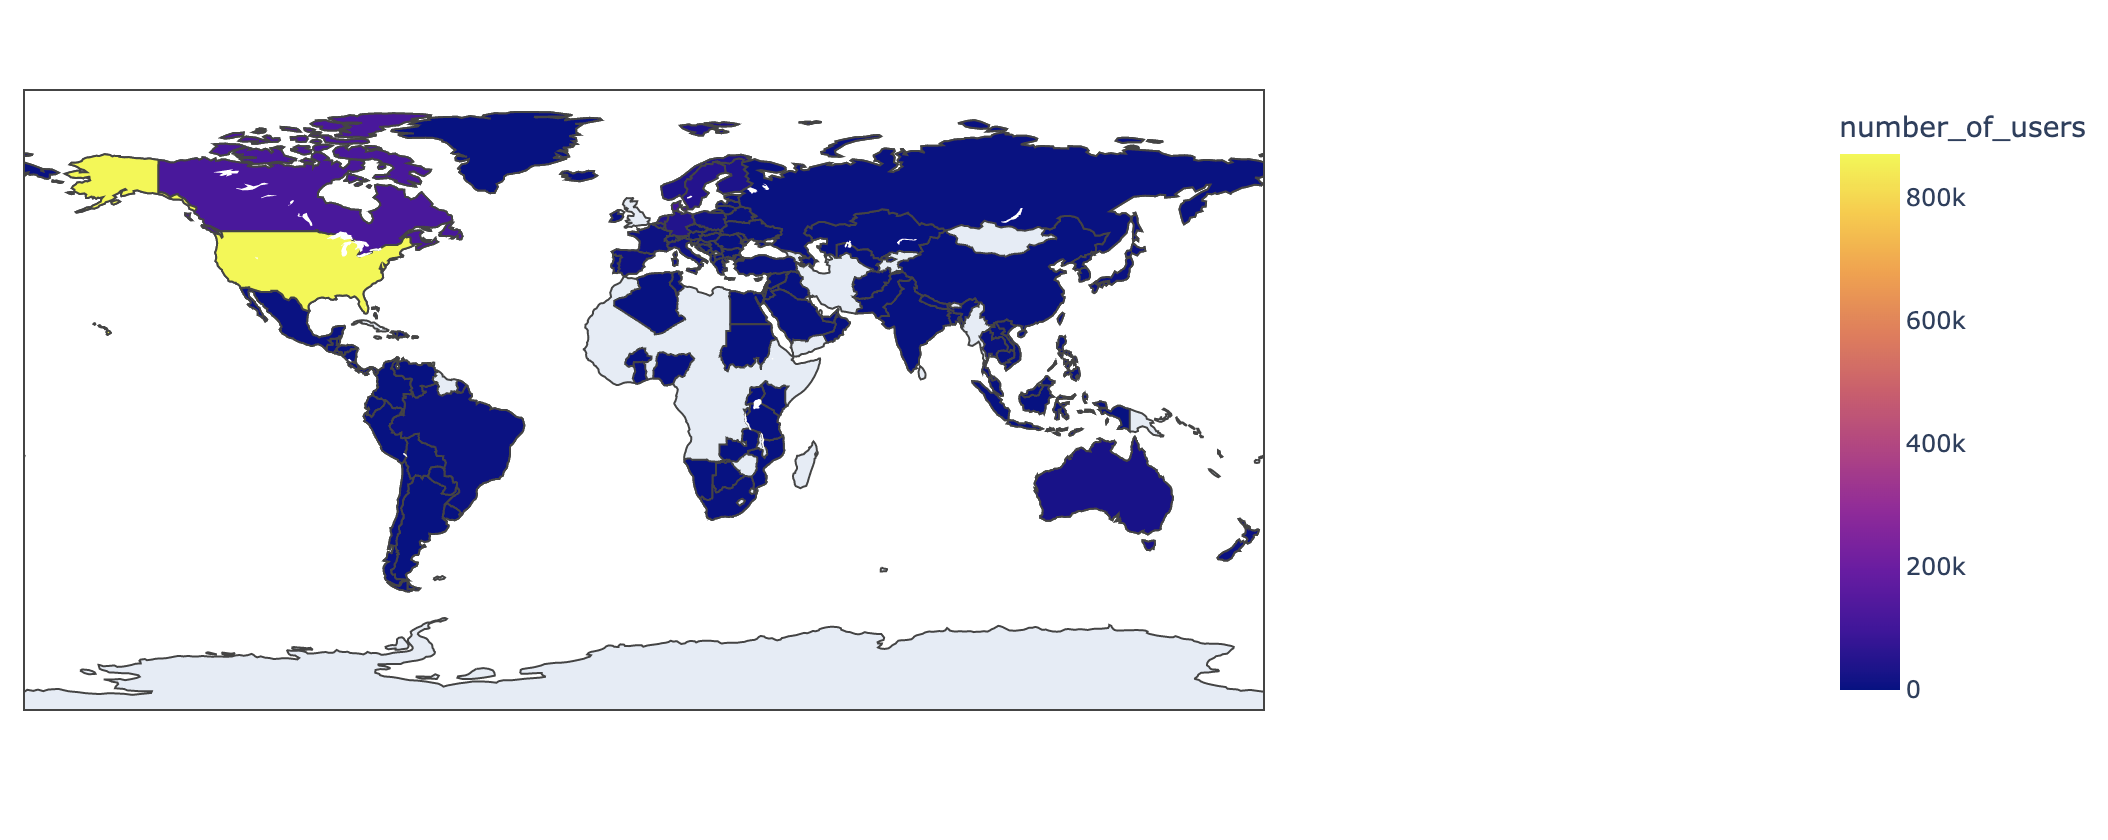

In [13]:
#here we plot the number of reviews per contry depending on the nationality of the user.
count_contry_users_RB=df_RB.groupby(['location_user']).count()['beer_name'].to_frame() 
count_contry_users_RB.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_RB.reset_index(inplace=True) 


import plotly.express as px 
 
fig = px.choropleth(count_contry_users_RB, 
                    locations='location_user',  
                    locationmode='country names',  
                    scope="world", 
                    color='number_of_users',  
                     
                    ) 
fig.show()
# Since the plots don't appear on GitHub we print screenshots for now 
from IPython import display
display.Image("./png1.png")

For BA and RB the majority of reviews come from the US(869k). It seems more interesting to focus on this region, it also easier for a political trend analysis.

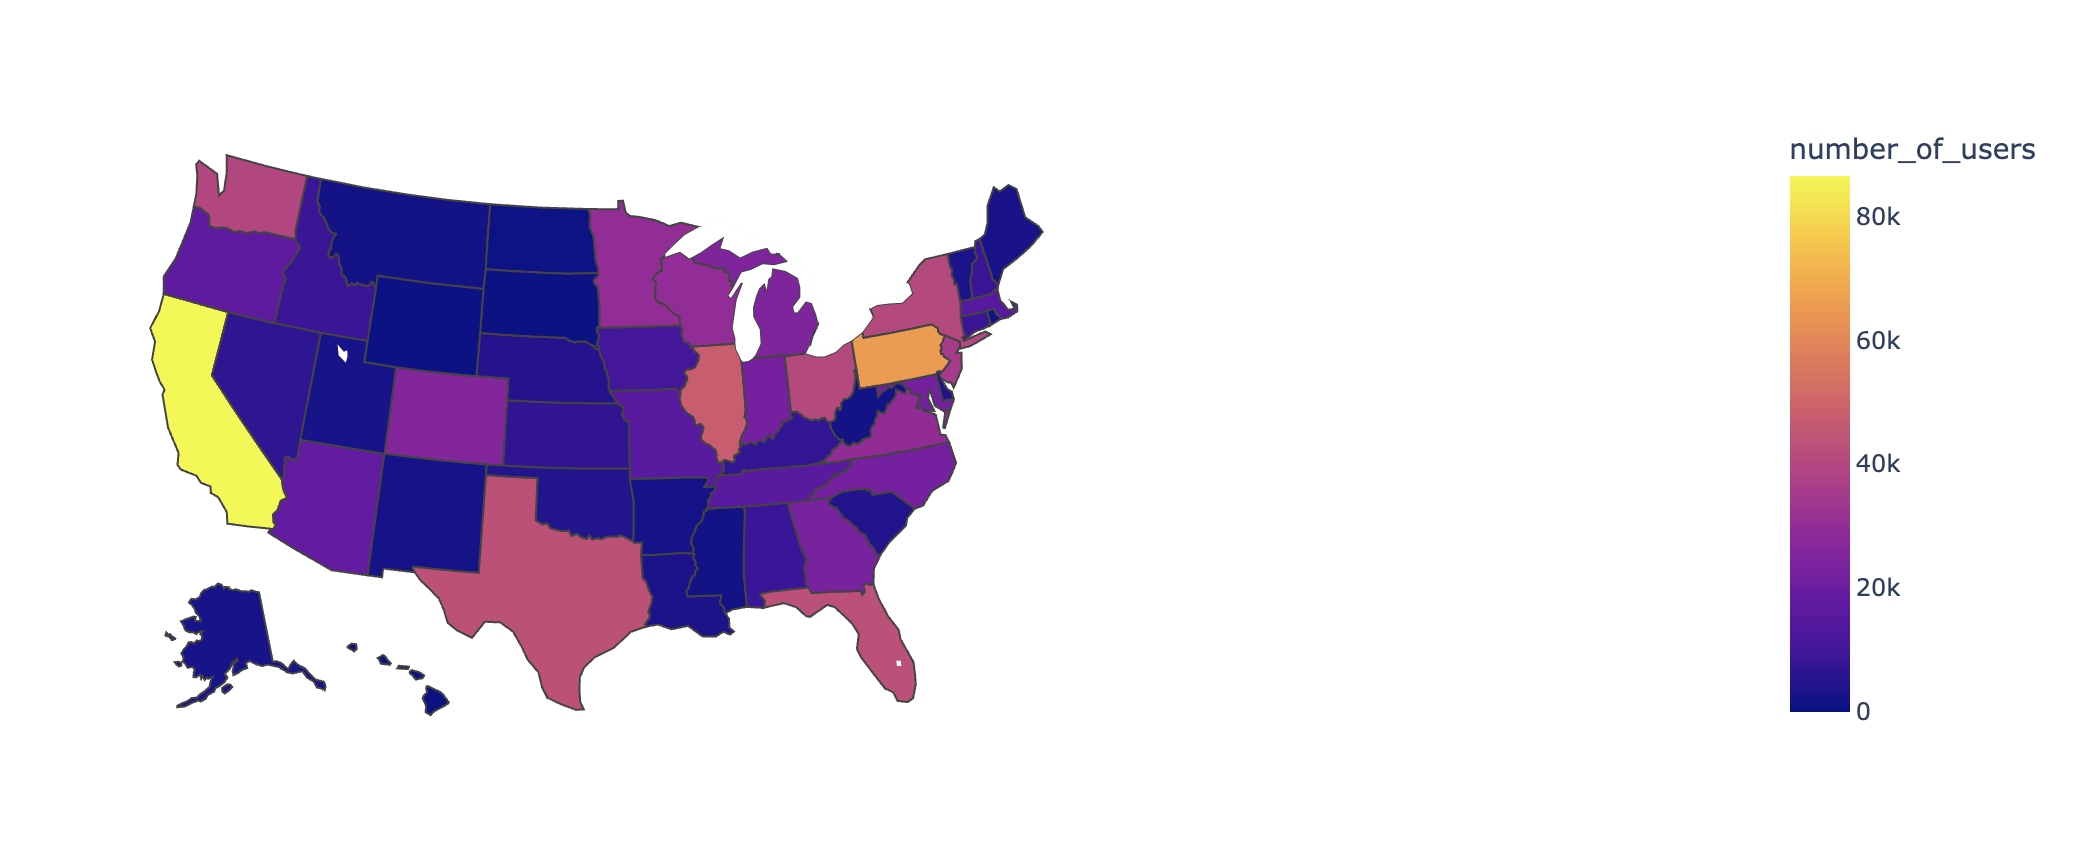

In [14]:
#For RB we plot the number of reviews per state depending on the nationality of the user.
count_contry_users_RB=df_RB.groupby(['US_Code_User']).count()['beer_name'].to_frame() 
count_contry_users_RB.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_RB.reset_index(inplace=True) 
count_contry_users_RB

fig = px.choropleth(count_contry_users_RB,  
                    locations='US_Code_User', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number_of_users'
                    ) 
fig.show()

display.Image("./png2.png")

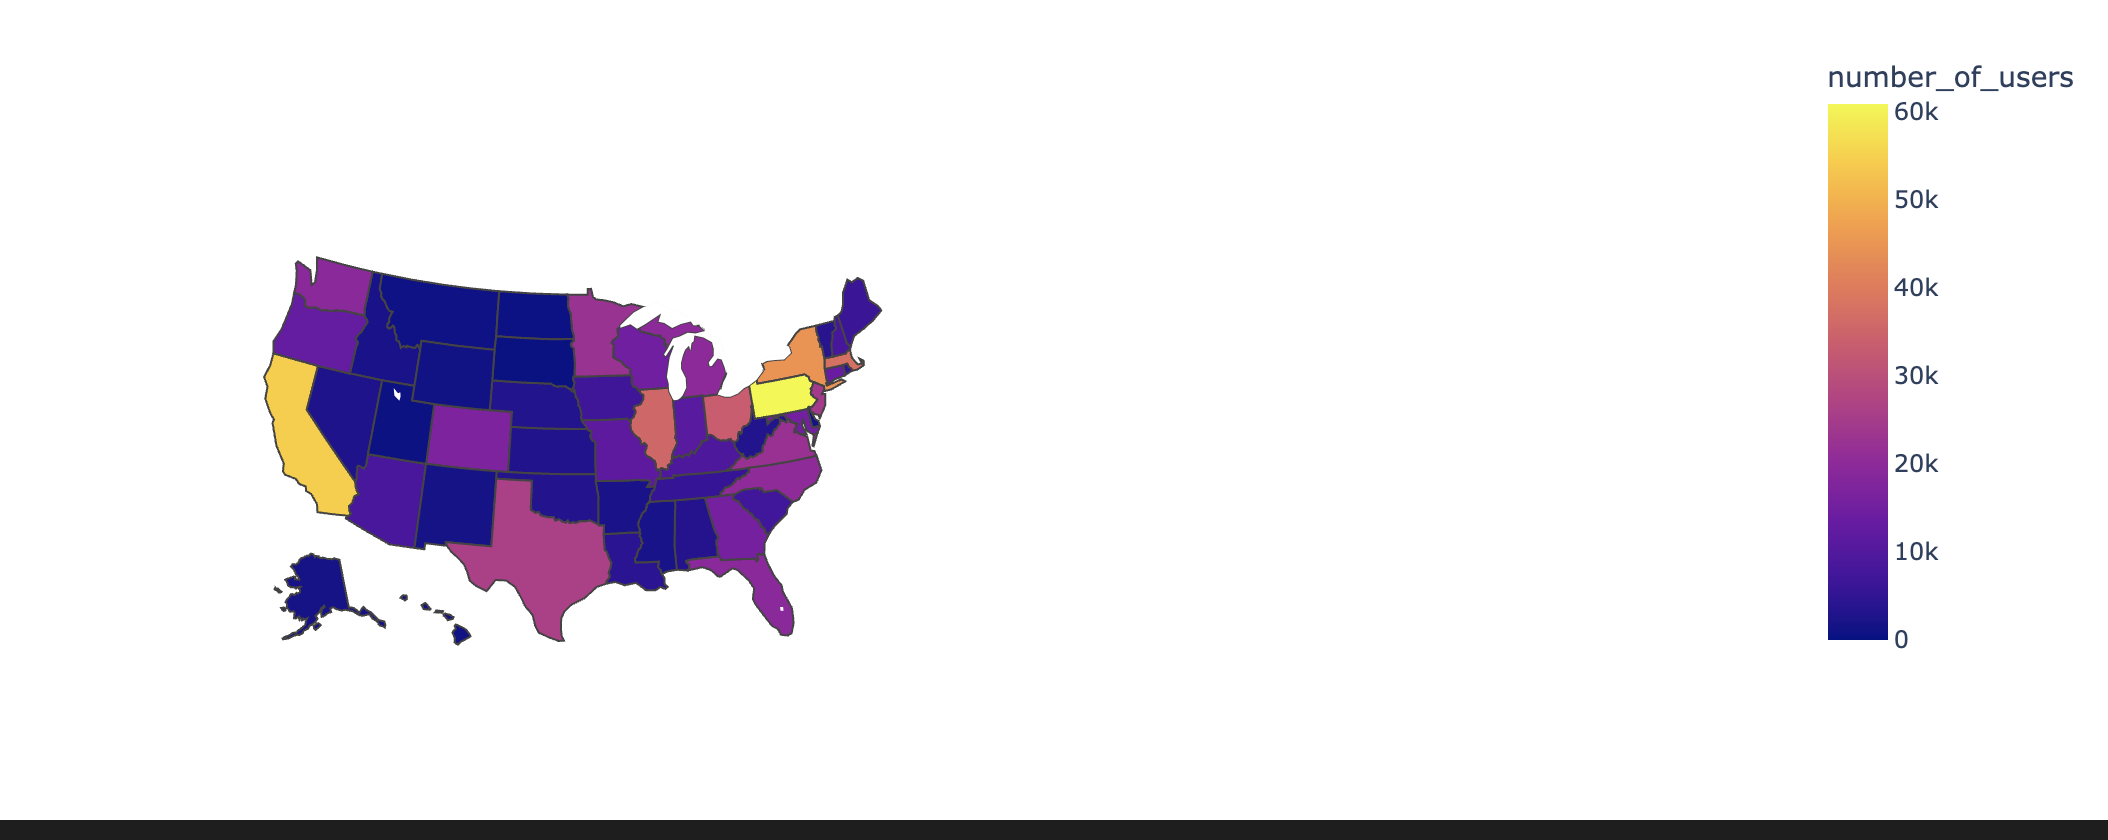

In [15]:
#For BA we plot the number of reviews per state depending on the nationality of the user.
count_contry_users_BA=df_BA.groupby(['US_Code_User']).count()['beer_name'].to_frame() 
count_contry_users_BA.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_BA.reset_index(inplace=True) 
count_contry_users_BA

fig = px.choropleth(count_contry_users_BA,  
                    locations='US_Code_User', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number_of_users'
                    ) 
fig.show()

display.Image("./png3.png")

For BA and RB, the data is not equally distributed between each state. We have to take into consideration that some states have a larger population and a higher beer consumption than others (we found 2 datasets). Using a scoring system, we will be able to determine if our analysis for a region is representative of its population. This criterion will be important for knowing if we keep or not a state for the analysis:(political trend)<->(beer consumption)?

In [16]:
#merge Rb and BA in a function
def merge_RB_BA(df_RB, df_BA):
    df_RB['source']='RB'
    df_BA['source']='BA'
    df_RB_BA=pd.concat([df_RB, df_BA], axis=0)
    return df_RB_BA

    

In [17]:
#create a function 

Test preferences without taking Politics.

In [18]:
df_RB

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.085652e+09,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.216030e+09,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.211623e+09,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.175594e+09,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.160042e+09,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661198,NaN,Nicaragua,NaN,Switzerland,Cerveza Premium (Nicaragua),26300.0,Compañía Cevercera de Nicaragua,3912.0,Pale Lager,4.0,1.218103e+09,Zavalas1,79805.0,5.0,10.0,5.0,10.0,20.0,5.0,"I have Tried beers from all over the world, an..."
1661199,NaN,Sint Maarten,NaN,France,Belzebuth 13°,4489.0,Grain dOrge (Brasseurs De Gayant),759.0,Belgian Strong Ale,13.0,1.427195e+09,JBaggett2013,362979.0,5.0,6.0,5.0,7.0,20.0,4.3,"caramel, roasty, resin, leather, alcohol, wood..."
1661200,NaN,Haiti,NaN,Japan,Oakham Helter Skelter,6309.0,Oakham,1100.0,Premium Bitter/ESB,5.0,1.252231e+09,skipoffwork,95191.0,5.0,10.0,5.0,10.0,20.0,5.0,This is the best beer Iâve tasted in a long ...
1661201,NaN,Tibet,NaN,Lithuania,Westvleteren 12 (XII),4934.0,Westvleteren Abdij St. Sixtus,623.0,Abt/Quadrupel,10.2,1.359889e+09,oooriii,228391.0,5.0,10.0,5.0,10.0,20.0,5.0,"Perfect, complete and complex. Grape, fig and ..."


In [23]:
#keep the raw of the dataframe if the beer location is in the US
df_RB_US=df_RB[df_RB['beers_location']=='United States']
df_RB_Foreign=df_RB[df_RB['beers_location']!='United States']



,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
2640,AL,United States,NaN,Australia,ABC Extra Stout,9226.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Foreign Stout,7.0,1.101035e+09,Jeppe,9058.0,4.0,7.0,4.0,8.0,15.0,3.8,Pours dark brown almost black with a tall ligh...
2641,AL,United States,NaN,Australia,Jever Pilsener,4003.0,Jever &#40;Oetker Group&#41;,686.0,Pilsener,4.9,1.385982e+09,nealblind,92636.0,3.0,6.0,2.0,6.0,12.0,2.9,"clear yellow pour some head. Aroma of bread, f..."
2642,AL,United States,NaN,Australia,Jever Pilsener,4003.0,Jever &#40;Oetker Group&#41;,686.0,Pilsener,4.9,1.296731e+09,hophopaway,122491.0,5.0,5.0,5.0,9.0,20.0,4.4,This is one of my favorite beers: it goes exc...
2643,AL,United States,NaN,Australia,Banks Caribbean Lager / Beer,4097.0,Banks Barbados Brewery,704.0,Pale Lager,4.7,1.184926e+09,Jeppe,9058.0,2.0,3.0,2.0,4.0,7.0,1.8,Plastic bottle brought home by yespr - thanks!...
2644,AL,United States,NaN,Australia,Banks Caribbean Lager / Beer,4097.0,Banks Barbados Brewery,704.0,Pale Lager,4.7,1.229252e+09,BeerHawk,23228.0,3.0,5.0,3.0,6.0,11.0,2.8,Bottle shared by lithy. Poured golden with a f...


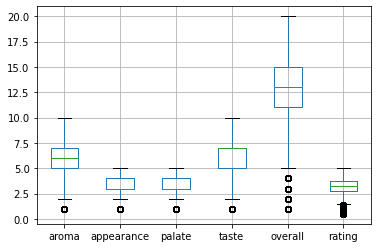

In [47]:
boxplot = df_RB_US.boxplot(column=['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating'])  



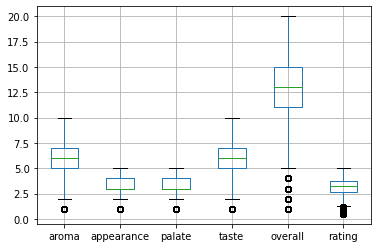

In [46]:
 boxplot = df_RB_Foreign.boxplot(column=['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating'])  

In [53]:
#do a t-test to see if the mean of the two sample are different
from scipy import stats
tmp = stats.ttest_ind(df_RB_US['aroma'][0:100000],  df_RB_Foreign['aroma'][0:100000], equal_var=False)
print("Independent sample t-test, t =", tmp.statistic, "/ p =", tmp.pvalue)
tmp = stats.ttest_rel(df_RB_US['aroma'][0:100000], df_RB_Foreign['aroma'][0:100000])
print("    Matched sample t-test, t =", tmp.statistic, "/ p =", tmp.pvalue)
print("    Mean difference in words =", (df_RB_US['aroma'].mean() - df_RB_Foreign['aroma'].mean()))

Independent sample t-test, t = -3.4576808223502162 / p = 0.0005449597127942849
    Matched sample t-test, t = -3.465297073459898 / p = 0.000529868058739523
    Mean difference in words = 0.043127024549097115


C:\Users\Achra\AppData\Local\Temp/ipykernel_31468/2124584814.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\Achra\AppData\Local\Temp/ipykernel_31468/2124584814.py:5: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [52]:
#booststrap a dataframe
def bootstrap(df, n=1000):
    df_bootstrap=pd.DataFrame()
    for i in range(n):
        df_bootstrap=pd.concat(df_bootstrap, df.sample(frac=1, replace=True))
    return df_bootstrap

bootstrap(df_RB_US, n=10)


C:\Users\Achra\AppData\Local\Temp/ipykernel_31468/1866233161.py:5: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

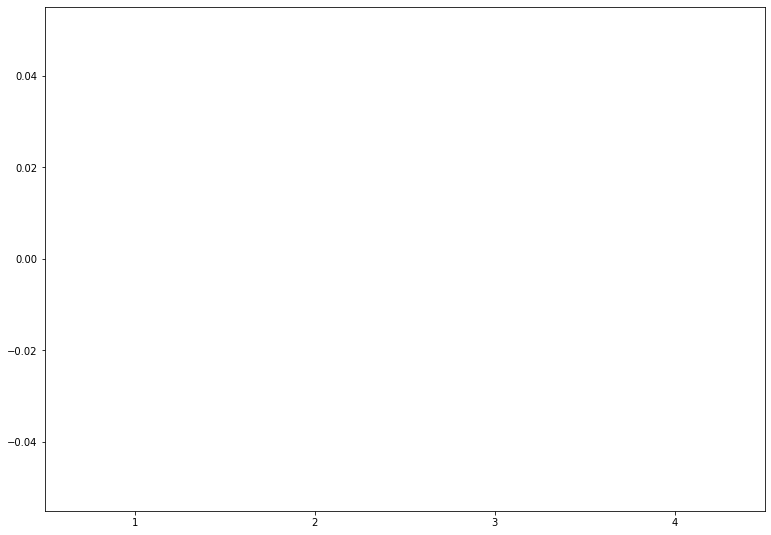